$k(i, j, m) = 10 \cdot \dfrac{e^{-\|i - j\|^2}}{2 l^2} \cdot \dfrac{e^{-\| i - m\|^2}}{2t^2} \cdot \dfrac{e^{-\| j - m\|^2}}{2t^2}$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

N = 100
grid = np.arange(N)
m = 40

t = 10
l = 20

def kernel(i, j, m):
    return 10 * np.exp(-(i - j) **2 / (2 * l **2)) \
        * np.exp(-(i - m) **2 / (2 * t **2)) * np.exp(-(j - m) **2 / (2 * t **2))
K = np.zeros((N, N))
for i in np.arange(N):
    for j in np.arange(N):
        K[i, j] = kernel(float(i), float(j), m)
K = K + 1e-8 * np.eye(N)

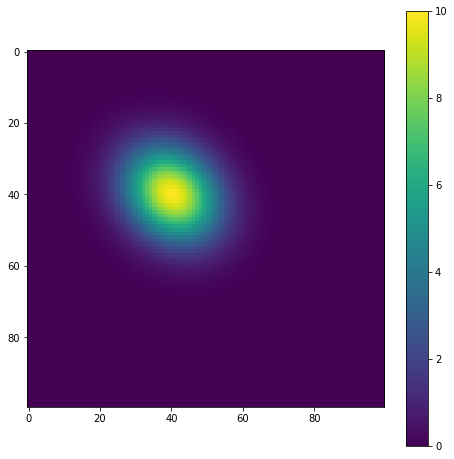

In [40]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(K.T)
plt.colorbar()

In [41]:
L = np.linalg.cholesky(K)

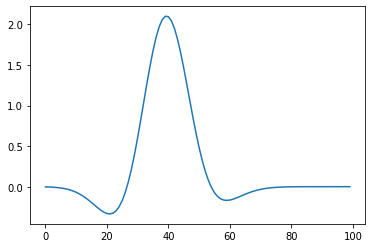

In [45]:
w = L @ np.random.randn(N)
plt.plot(w)

In [178]:
K_eig, K_ev = np.linalg.eigh(K)

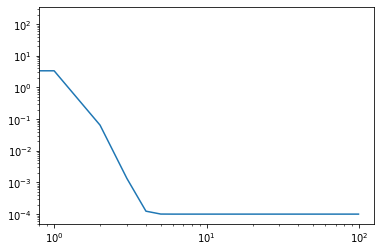

In [166]:
plt.loglog(np.flip(K_eig))

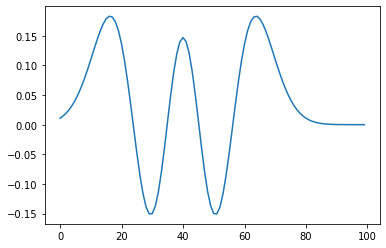

In [172]:
plt.plot(K_ev[:, -5])

The eigenfunction of the covariance function of a GP measures the amount of uncertainty (variance) the GP puts along that direction.  

Stationary covariance between $X_s$ and $X_t $means that the covariance depends only on the difference 
between $t - s$ and not in the values of $t$ and $s$ themselves.

In [106]:
K.shape

(100, 100)

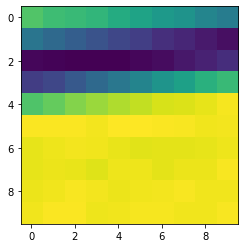

In [107]:
n = 10
A = np.random.multivariate_normal(np.zeros(n ** 2), K, 50)
fig = plt.figure()
plt.imshow(A[0].reshape(10, 10))

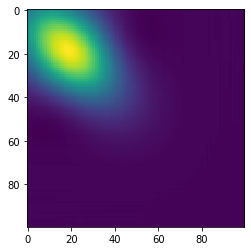

In [108]:
fig = plt.figure()
plt.imshow(np.dot(A.T, A))

We will derive the kernel for our band limited GP features. Our random features are:
$$w(t) = Re \bigg(\sum_{j=0}^{N-1} \sqrt{\lambda_j} G_j e^{\dfrac{i 2  \pi jt }{N}}\bigg)$$

Then, the kernel for our GPs are:
$$k(t, t') = \mathbb{E}[w(t)^T w(t')] =  \sum_{j=0}^{N-1} \lambda_j \cos{\dfrac{i 2 \pi j (t-t')}{N}} $$

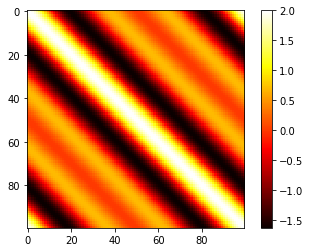

In [4]:
# covariance for bandpass GP weights
N = 100
j = np.arange(0, N -1, 1)
lamda = np.zeros_like(j)
lamda[2:4] = 1
kernel = np.zeros((N, N), dtype=np.complex)
for m in range(N):
    for n in range(N):
#         kernel[m, n] = np.sum(lamda * np.cos(2 * np.pi * j * (m - n) / N))
        kernel[m, n] = np.sum(lamda * np.exp(1j * 2 * np.pi * j * (m - n) / N))

fig = plt.figure()
plt.imshow(kernel.real, cmap='hot')
plt.colorbar()

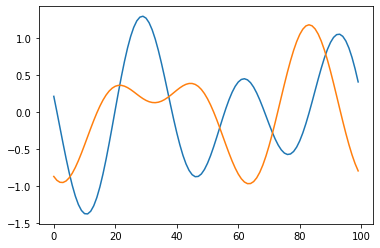

In [111]:
# sample from this kernel
W = np.random.multivariate_normal(np.zeros(N), kernel.real, 10)
fig = plt.figure()
plt.plot(W[0])
plt.plot(W[1])

In [78]:
np.max(kernel.real)

1.9677621076846095

array([[2.        +0.j        , 1.97440195-0.31271455j,
        1.89835965-0.61681444j, ..., 1.77410441+0.90395135j,
        1.89835965+0.61681444j, 1.97440195+0.31271455j],
       [1.97440195+0.31271455j, 2.        +0.j        ,
        1.97440195-0.31271455j, ..., 1.60527531+1.16630078j,
        1.77410441+0.90395135j, 1.89835965+0.61681444j],
       [1.89835965+0.61681444j, 1.97440195+0.31271455j,
        2.        +0.j        , ..., 1.39680225+1.39680225j,
        1.60527531+1.16630078j, 1.77410441+0.90395135j],
       ...,
       [1.77410441-0.90395135j, 1.60527531-1.16630078j,
        1.39680225-1.39680225j, ..., 2.        +0.j        ,
        1.97440195-0.31271455j, 1.89835965-0.61681444j],
       [1.89835965-0.61681444j, 1.77410441-0.90395135j,
        1.60527531-1.16630078j, ..., 1.97440195+0.31271455j,
        2.        +0.j        , 1.97440195-0.31271455j],
       [1.97440195-0.31271455j, 1.89835965-0.61681444j,
        1.77410441-0.90395135j, ..., 1.89835965+0.61681444j,
 